In [31]:
import pandas as pd 
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore") #pembe uyarıları kaldırır.
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("World military power.xlsx",skiprows=[0])
#skiprows=[0] çift header olduğu için bir tanesini atlamak için kullanıldı.

In [3]:
df.sample(10)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
42,Georgia,1.6679,Georgia,66.0,Georgia,0.0,Georgia,10.0,Georgia,2.0,Georgia,12.0,Georgia,38.0,Georgia,9.0,Georgia,143.0,Georgia,950.0,Georgia,69.0,Georgia,133.0,Georgia,51.0,Georgia,9.0,Georgia,0.0,Georgia,0.0,Georgia,0.0,Georgia,0.0,Georgia,"32,70,00,000",Georgia,"16,99,00,00,000",Georgia,22.0,Georgia,400.0,Georgia,18500.0,Georgia,"3,50,00,000",Georgia,"22,49,744",Georgia,"49,26,087",Georgia,69700.0,Georgia,310.0,Georgia,4349.0,Georgia,1814.0
82,Netherlands,0.5919,Netherlands,168.0,Netherlands,61.0,Netherlands,1.0,Netherlands,4.0,Netherlands,27.0,Netherlands,75.0,Netherlands,28.0,Netherlands,18.0,Netherlands,1546.0,Netherlands,57.0,Netherlands,160.0,Netherlands,0.0,Netherlands,63.0,Netherlands,0.0,Netherlands,4.0,Netherlands,0.0,Netherlands,6.0,Netherlands,"12,41,90,00,000",Netherlands,"40,63,00,00,00,000",Netherlands,29.0,Netherlands,18170.0,Netherlands,"8,40,000",Netherlands,"11,32,00,000",Netherlands,"78,20,960",Netherlands,"1,71,51,228",Netherlands,41543.0,Netherlands,451.0,Netherlands,6237.0,Netherlands,1053.0
53,Ireland,1.9481,Ireland,19.0,Ireland,0.0,Ireland,0.0,Ireland,0.0,Ireland,8.0,Ireland,8.0,Ireland,0.0,Ireland,0.0,Ireland,124.0,Ireland,0.0,Ireland,0.0,Ireland,0.0,Ireland,8.0,Ireland,0.0,Ireland,0.0,Ireland,0.0,Ireland,0.0,Ireland,"87,00,00,000",Ireland,"24,70,00,00,00,000",Ireland,40.0,Ireland,0.0,Ireland,"1,45,000",Ireland,0.0,Ireland,"23,66,779",Ireland,"50,68,050",Ireland,70273.0,Ireland,1448.0,Ireland,956.0,Ireland,443.0
113,Sri Lanka,1.4661,Sri Lanka,77.0,Sri Lanka,0.0,Sri Lanka,0.0,Sri Lanka,15.0,Sri Lanka,6.0,Sri Lanka,54.0,Sri Lanka,9.0,Sri Lanka,202.0,Sri Lanka,570.0,Sri Lanka,0.0,Sri Lanka,209.0,Sri Lanka,22.0,Sri Lanka,40.0,Sri Lanka,0.0,Sri Lanka,0.0,Sri Lanka,0.0,Sri Lanka,0.0,Sri Lanka,"2,50,00,00,000",Sri Lanka,"51,72,00,00,000",Sri Lanka,19.0,Sri Lanka,0.0,Sri Lanka,90000.0,Sri Lanka,0.0,Sri Lanka,"1,09,27,071",Sri Lanka,"2,25,76,592",Sri Lanka,65610.0,Sri Lanka,1340.0,Sri Lanka,160.0,NaN,NaN
135,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,Yemen,21.0,Yemen,61.0,Yemen,14.0,Yemen,620.0,Yemen,615.0,Yemen,20.0,Yemen,85.0,Yemen,150.0,Yemen,30.0,Yemen,0.0,Yemen,0.0,Yemen,0.0,Yemen,0.0,Yemen,"1,40,00,00,000",Yemen,"7,06,80,00,000",Yemen,57.0,Yemen,12260.0,Yemen,"1,45,000",Yemen,"3,00,00,00,000",Yemen,"1,12,66,221",Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906.0,Yemen,0.0,Yemen,1601.0
75,Mongolia,2.0299,Mongolia,9.0,Mongolia,0.0,Mongolia,0.0,Mongolia,3.0,Mongolia,0.0,Mo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [5]:
df_militaries=df.loc[:,['Military Strength']] #iki tane military strength olduğu için bire düşürdük.

In [6]:
df=df.loc[:,[i%2==1 for i in range(60)]]#60 tane sütundan iki de bir alıyor strength yazan metin kolonları almıyor a

In [7]:
df=pd.concat([df_militaries,df],axis=1)#yaptığımız yeni dataframe ile birleştiriyoruz

In [8]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,"12,00,00,00,000","2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,"25,00,00,000","9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,"13,00,00,00,000","6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,"7,00,00,00,000","42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,"4,20,00,00,000","2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


In [9]:
columns = df.select_dtypes("object").columns
columns

Index(['Military Strength', 'defense spending budget value',
       'External Debt value', 'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value'],
      dtype='object')

In [10]:
for col in columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [12]:
x=df.drop('Military Strength', axis=1)

In [13]:
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,1062.0,0.0,176.0,50.0,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,467.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,7361.0,320.0,240.0,316.0,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,595.0,28.0,357.0,115.0,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,739.0,83.0,172.0,26.0,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [14]:
x.isnull().any().sum()#kaç tane boş kolon olduğunu gösterir.

7

In [15]:
x.columns[x.isnull().any()]

Index(['Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'Total Coastline Coverage value',
       'Total Border Coverage value'],
      dtype='object')

In [16]:
col=[x.columns[x.isnull().any()]]#col'a boş olan colonlardaki değeri atamış oluruz

In [17]:
for i in col:
  #x[i]=x[i].fillna(x[i].median())
  x[i]=x[i].fillna(0)
#her boş veri geldiğinde 0 ile doldurur.

In [18]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [19]:
from yellowbrick.cluster import KElbowVisualizer

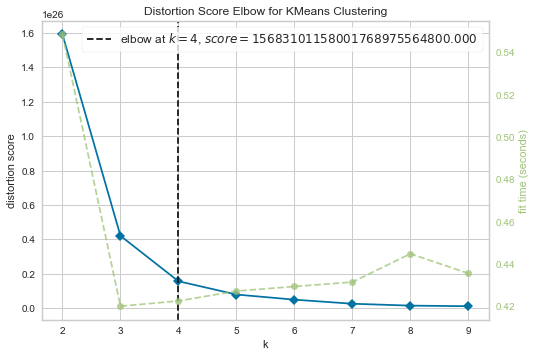

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [21]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.9227153206136329
Number of cluster 3,silhouette0.8995442950361631
Number of cluster 4,silhouette0.8671436271439987
Number of cluster 5,silhouette0.8675195540746111
Number of cluster 6,silhouette0.7789462745536555
Number of cluster 7,silhouette0.7817947546427708
Number of cluster 8,silhouette0.7847423623940264
Number of cluster 9,silhouette0.6818555400770482


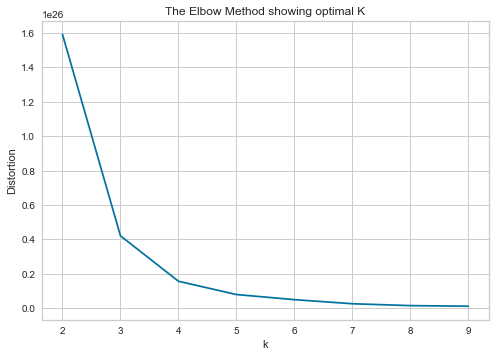

In [22]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?

In [23]:
model=KMeans(n_clusters=4)

In [24]:
model=model.fit(x)

In [25]:
tahmin=model.predict(x)

In [26]:
x['cluster']=tahmin

In [27]:
silhouette_score(x,tahmin)

0.8671436271439987

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


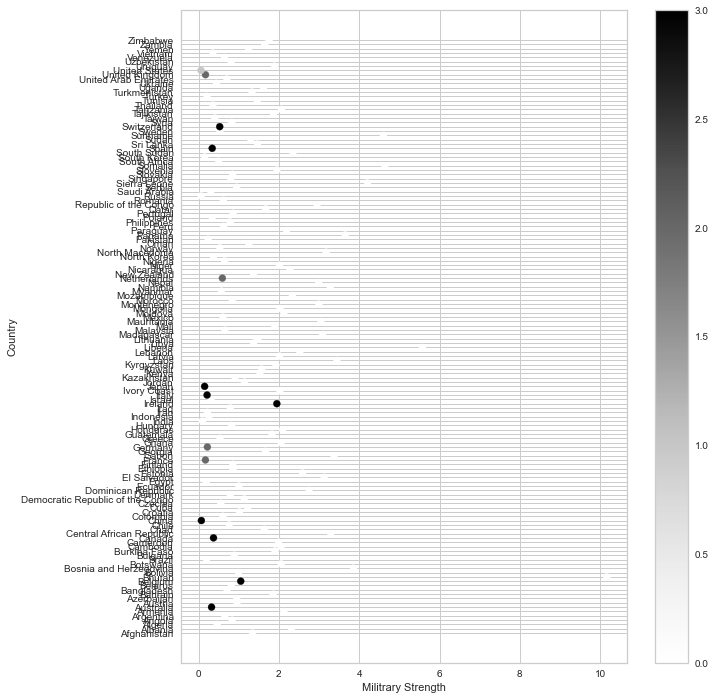

In [28]:
plt.figure(figsize=(10,12))
plt.scatter(x['Military Strength Power Index'],df['Military Strength'],c=tahmin)
plt.xlabel('Militrary Strength')
plt.ylabel('Country')
plt.legend()
plt.colorbar()
plt.show()

In [33]:
d={1:"Az gelismis",2:"cok gelismis",3:"gelismis",0:"orta gelismis"}
x['gelismis']=x.cluster.map(d)

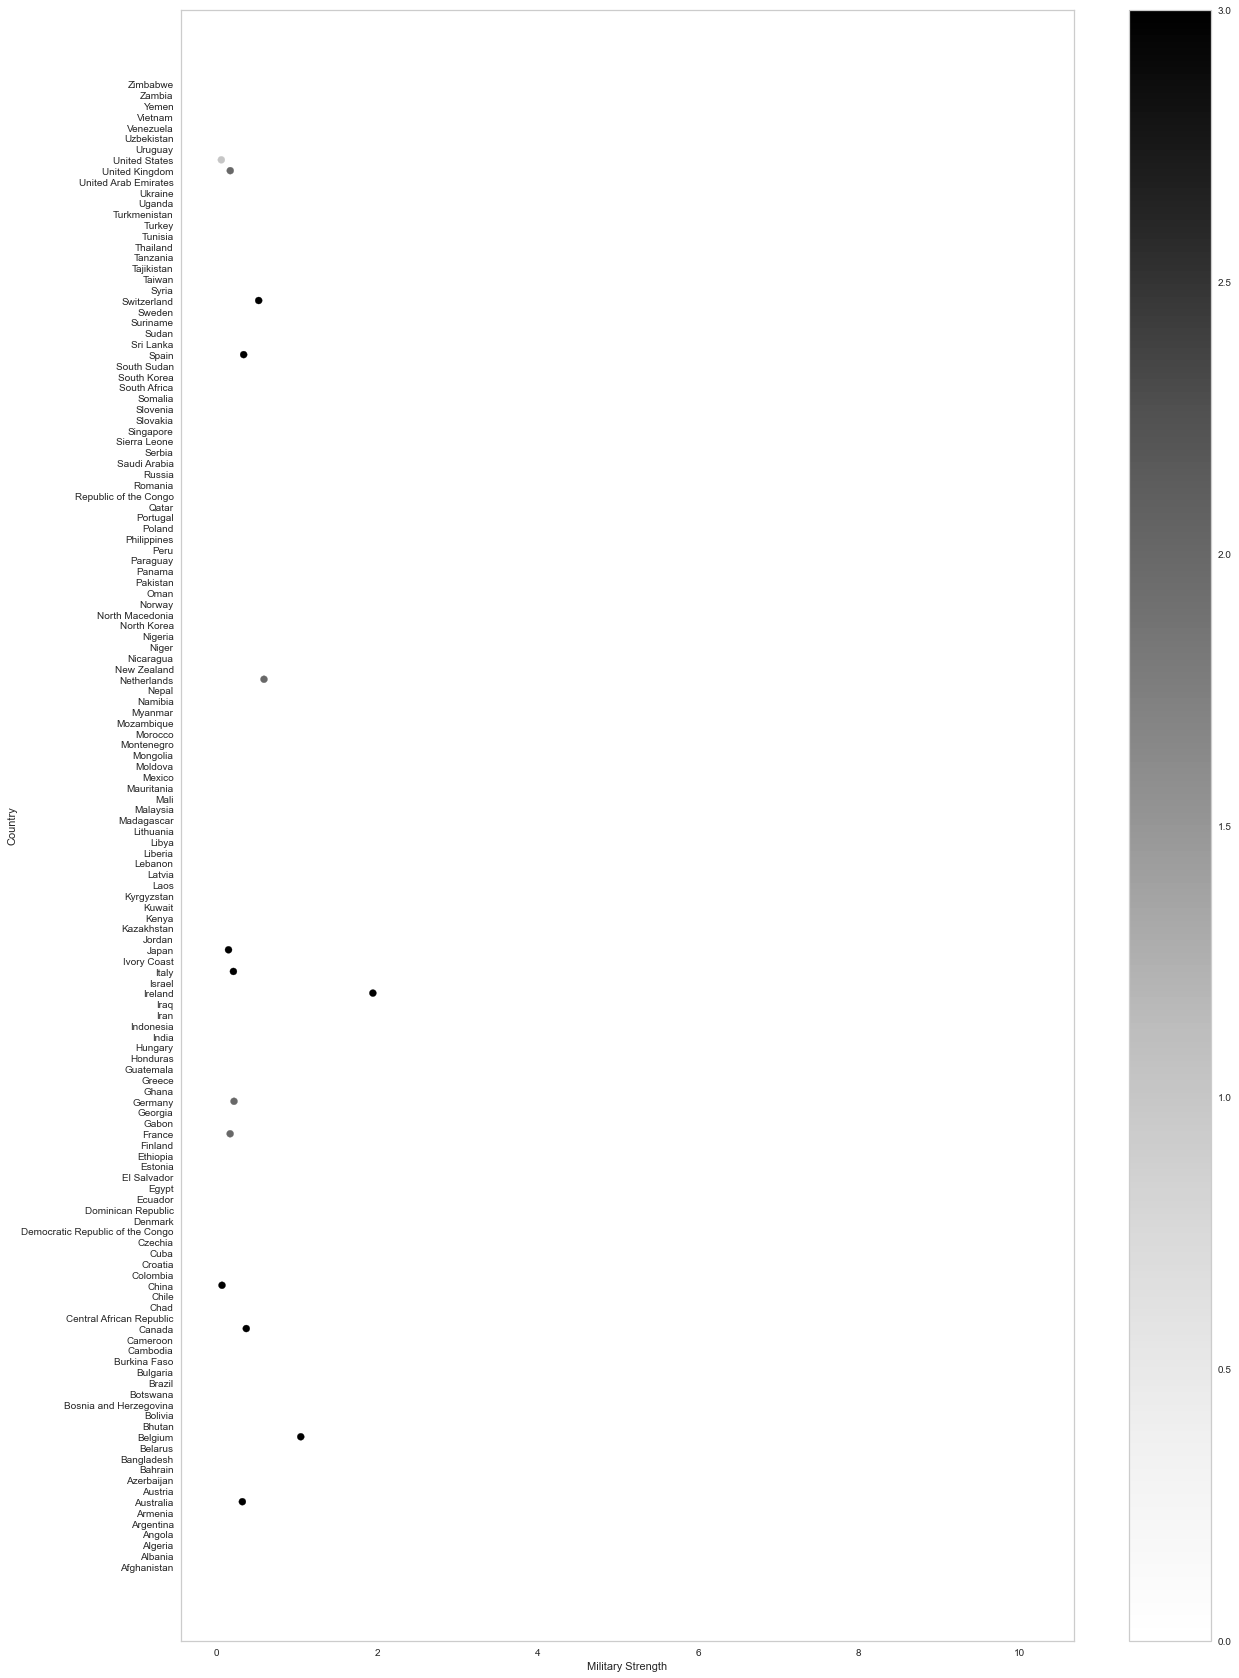

In [41]:
plt.figure(figsize=(20,30))
plt.scatter(x['Military Strength Power Index'],df['Military Strength'],c=tahmin)
plt.xlabel("Military Strength")
plt.ylabel("Country")
plt.colorbar()
plt.grid()#arkadaki kareleri oluşturur

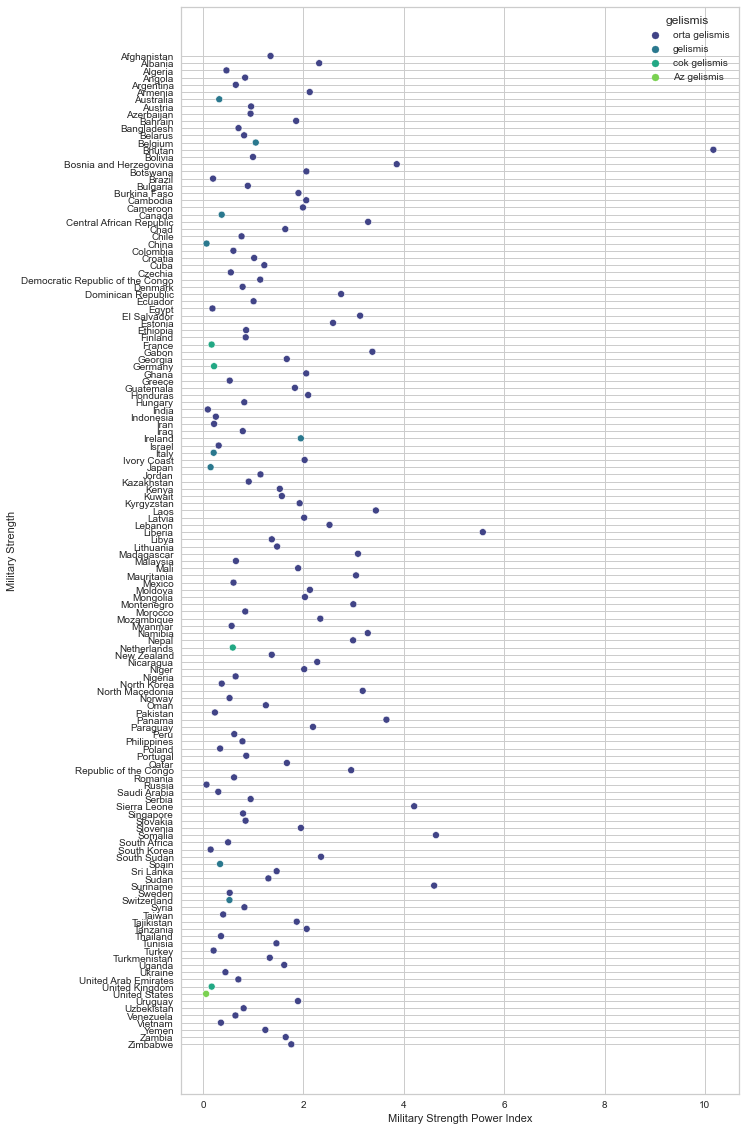

In [35]:
plt.figure(figsize=(10,20))
sns.scatterplot(x["Military Strength Power Index"], 
                df["Military Strength"], hue= x.gelismis,palette= "viridis");

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


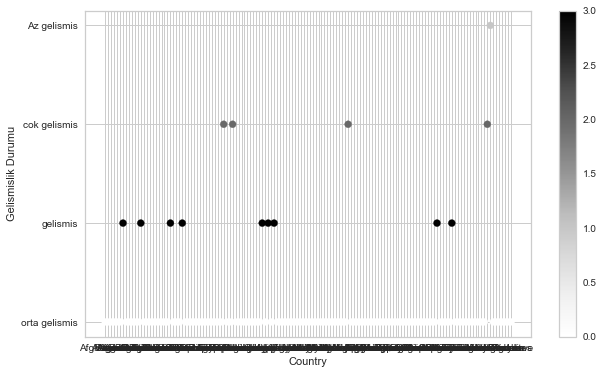

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df['Military Strength'],x['gelismis'],c=tahmin)
plt.xlabel('Country')
plt.ylabel('Gelismislik Durumu')
plt.legend()
plt.colorbar()
plt.show()

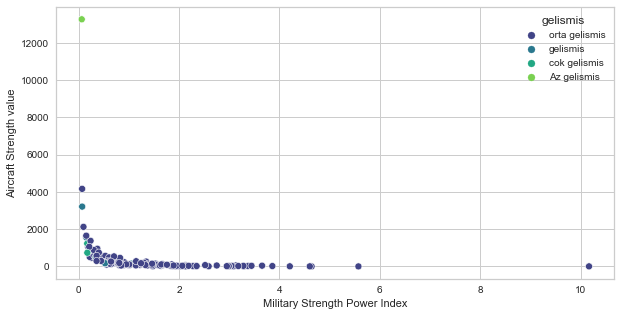

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x["Military Strength Power Index"], 
                x['Aircraft Strength value'], hue= x.gelismis,palette= "viridis");